<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [41]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [42]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

## Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: Generate basic statistics and visualizations for upper management. 

Task 3: Use the appropriate tests to answer the questions provided.

Task 4: Share your Jupyter Notebook.



## Task 2

### For the "Median value of owner-occupied homes" provide a boxplot

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

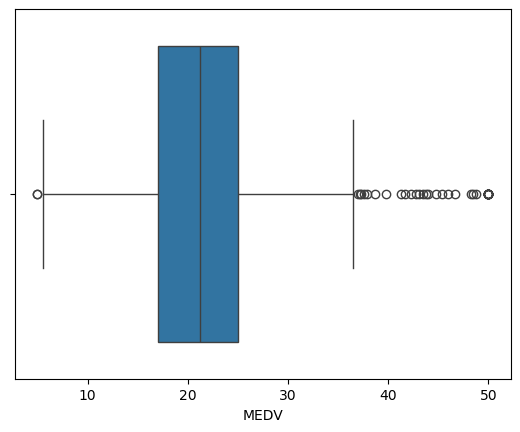

In [21]:
ax = sns.boxplot(x = "MEDV", data = boston_df)
plt.show()

### Provide a bar plot for the Charles river variable

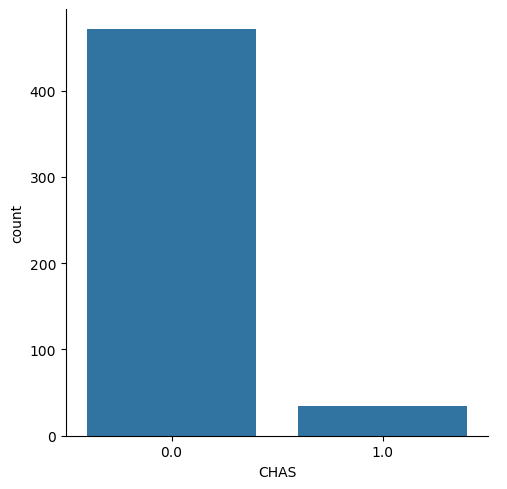

In [22]:
ax = sns.catplot(x = "CHAS", kind = "count", data = boston_df)
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age group'] = "between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'age group'] = "70 years and older"

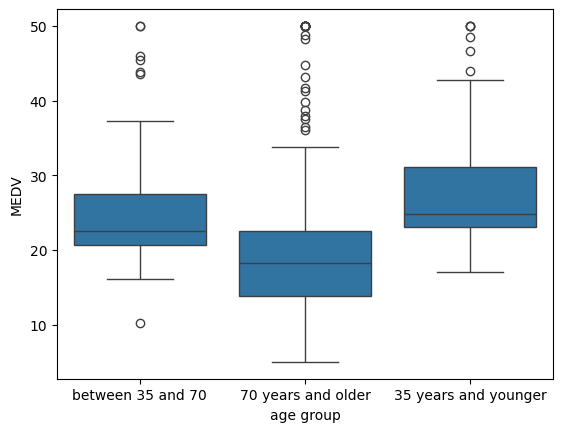

In [27]:
ax = sns.boxplot(x = "age group", y = "MEDV", data = boston_df)
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

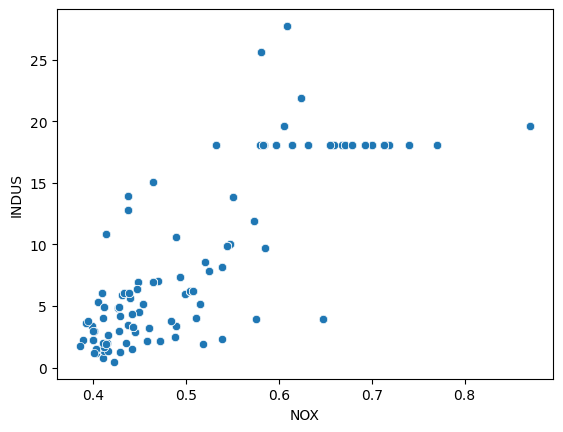

In [28]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
plt.show()

##### Evalutation:
there is a positive relationship between the two variables but with a relatively weak correlation

### Create a histogram for the pupil to teacher ratio variable

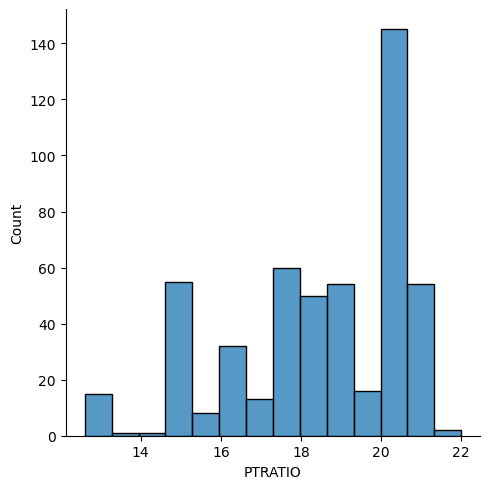

In [30]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
plt.show()

## Task 3:

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


#### Hypothesis:
Null Hypothesis: There is no significant difference in the mean value of houses bounded by the Charles River and those that are not.

Alternative Hypothesis: There is a significant difference in the mean value of houses bounded by the Charles River and those that are not.


In [52]:
bounded = boston_df[boston_df['CHAS'] == 1.0]['MEDV']
non_bounded = boston_df[boston_df['CHAS'] == 0.0]['MEDV']
scipy.stats.ttest_ind(bounded, non_bounded)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Conclusion:
p = 0.04979762721 and α = 0.05 

Since p<α, we reject the null hypothesis. This indicates that there is a significant difference in the mean value of houses bounded by the Charles River and those that are not.









### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


#### Hypothesis:
Null Hypothesis: There is no significant difference in the mean MEDV values across the AGE categories.

Alternative Hypothesis: At least one AGE category has a significantly different mean MEDV value.

In [54]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age group'] = "between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'age group'] = "70 years and older"

In [55]:
thirtyfive_younger = boston_df[boston_df['age group'] == "35 years and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['age group'] == "between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['age group'] == "70 years and older"]['MEDV']

In [56]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print("p value:", p_value, "f statistic:", f_statistic)

p value: 1.7105011022702984e-15 f statistic: 36.40764999196599


#### Conclusion:
p = 5.23246256*10^{-7} and α = 0.05 

Since p<α, we reject the null hypothesis. This indicates that there is a significant difference in the mean MEDV values across the AGE categories.




### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


#### Hypothesis:
Null Hypothesis: There is no significant linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.

Alternative Hypothesis: There is a significant linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town. 


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

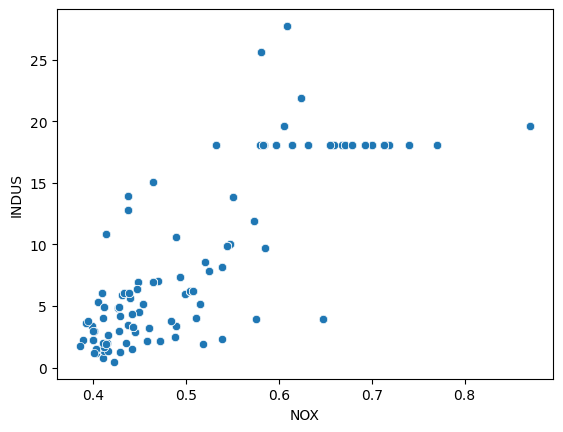

In [58]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df["INDUS"])

#### Conclusion:
p = 2.17521282*10^{-42} and α = 0.05 

Since p<α, we reject the null hypothesis. This indicates that there is a significant linear relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Hypothesis:
Null Hypothesis: There is no significant relationship between the additional weighted distance to the five Boston employment centers and the median value of owner-occupied homes.

Alternative Hypothesis: There is a significant relationship between the additional weighted distance to the five Boston employment centers and the median value of owner-occupied homes.

In [60]:
x = boston_df["DIS"]
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        00:48:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
p = 4.0590978*10^{-4} and α = 0.05 

Since p<α, we reject the null hypothesis. This indicates that there is a significant relationship between the additional weighted distance to the five Boston employment centers and the median value of owner-occupied homes